In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [40]:
csv = r"C:\Users\andre\OneDrive\Desktop\IH DATA\Week 4 Descriptive Stats\Lab Univariate\lab-eda-univariate\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(csv)

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.


In [41]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [42]:
ct_cat_isbest = pd.crosstab(df["category"], df["isBestSeller"])

- Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


In [43]:
ct_cat_isbest_portion = pd.crosstab(df["category"], df["isBestSeller"], normalize="index")*100
ct_cat_isbest_portion = ct_cat_isbest_portion.sort_values(by=ct_cat_isbest_portion.columns[1],ascending =False)[:20]

In [44]:
ct_cat_isbest.sort_values(by=ct_cat_isbest.columns[1], ascending= False)[:20]

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
Beauty,19010,302
Pet Supplies,9152,285
Arts & Crafts,9319,230
Women,17559,213


In [45]:
from scipy.stats import chi2_contingency

2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [46]:
from scipy.stats import chi2_contingency

In [47]:
chi2, p, dof, expected = chi2_contingency(ct_cat_isbest)
chi2, p, dof 

(36540.20270061387, 0.0, 295)

In [48]:
from scipy.stats.contingency import association 

association(ct_cat_isbest,method = "cramer")

0.1222829439760564

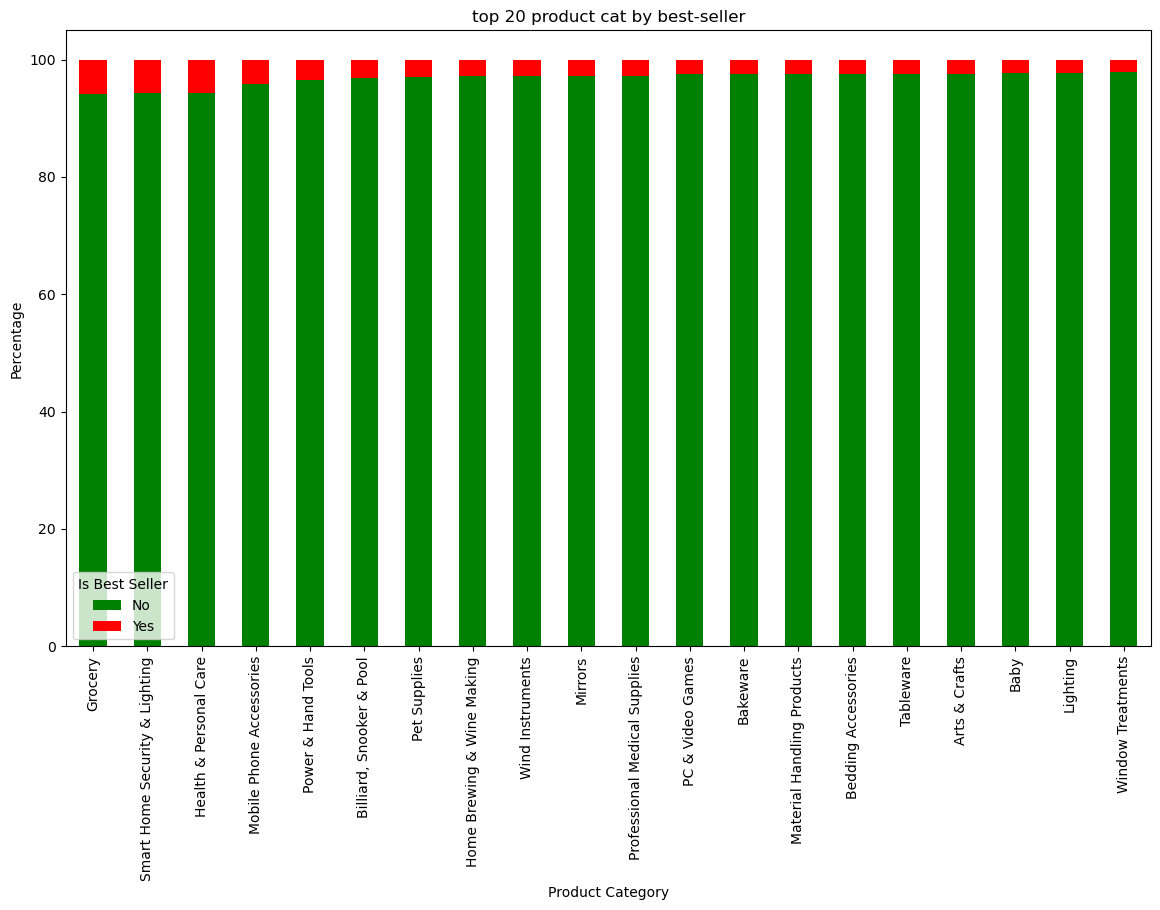

In [49]:
ct_cat_isbest_portion.plot(kind ="bar", stacked = True, figsize= (14,8), color = ["green","red"])
plt.title("top 20 product cat by best-seller")
plt.xlabel("Product Category")
plt.ylabel("Percentage")
plt.legend( title = "Is Best Seller", labels = ["No","Yes"])
plt.xticks(rotation=90)
plt.show()

Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [50]:
def removing_outliers (data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    
    IQR = Q3 - Q1 
    
    l_bound = Q1 - 1.5 * IQR
    u_bound = Q3 + 1.5 * IQR 
    
    df_no_outliers = data[(data[column_name] >= l_bound ) & (data[column_name] <= u_bound)]
    
    return df_no_outliers

In [51]:
df = removing_outliers(df,"price")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


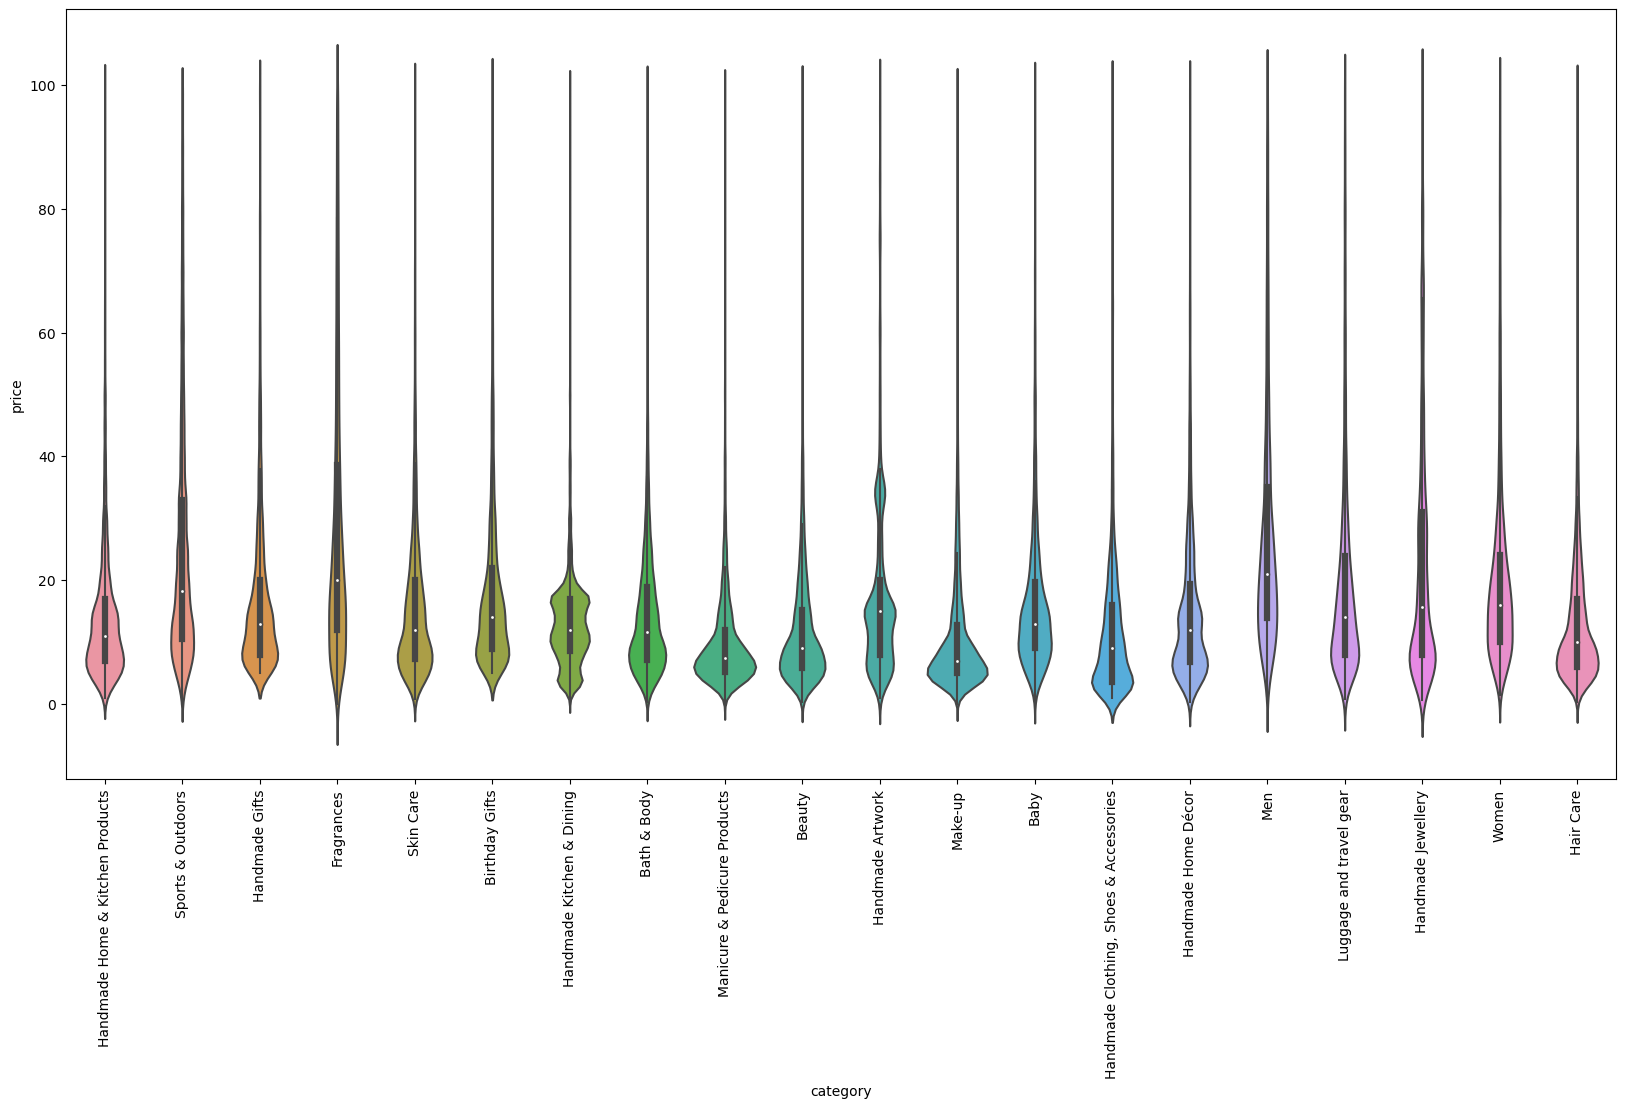

In [58]:
top_20 = df["category"].value_counts().nlargest(20).index # top 20 by category

df_top_20 = df[df["category"].isin(top_20)]
plt.figure(figsize=(20,10))
sns.violinplot(x="category", y="price",data = df_top_20)
plt.xticks(rotation= 90)
plt.show()


In [53]:
median = df.groupby("category")["price"].median()
highest_median_cat = median.idxmax()
highest_median_price = median.max()

highest_median_cat,highest_median_price




('Desktop PCs', 74.0)

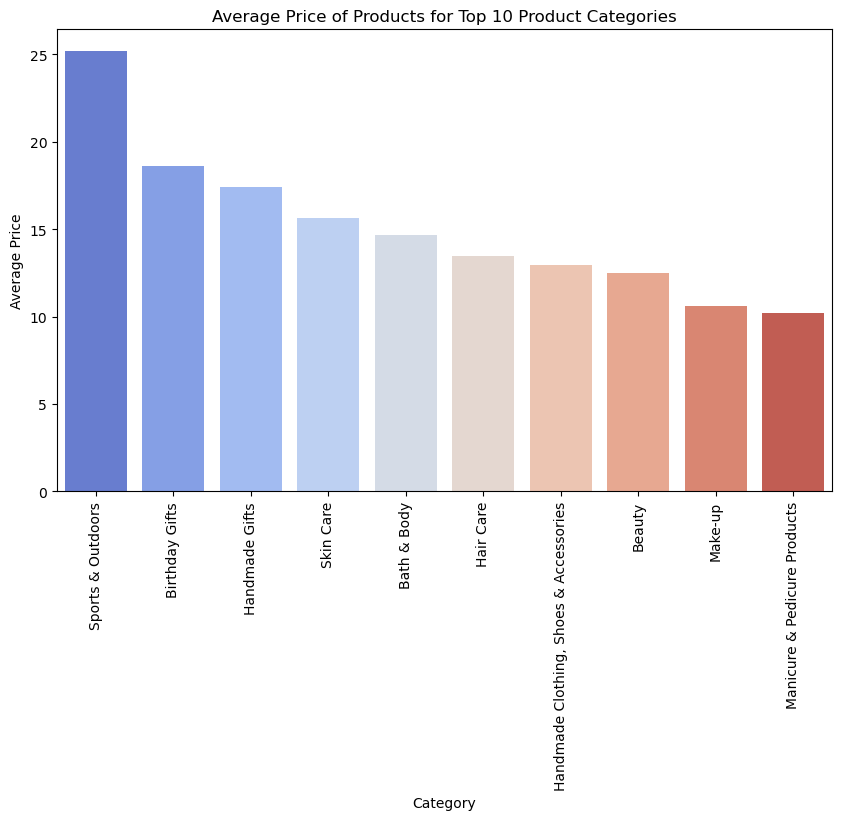

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

average_price_per_category = df.groupby('category')['price'].mean()

top_10_categories = df['category'].value_counts().nlargest(10).index

average_prices_top_10 = average_price_per_category.loc[top_10_categories].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_prices_top_10.index, y=average_prices_top_10.values, palette='coolwarm')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()


In [55]:
# Find the category with the highest average price
highest_avg_price_category = average_price_per_category.idxmax()
highest_avg_price = average_price_per_category.max()


highest_avg_price_category,highest_avg_price

('Motherboards', 68.77243243243242)

In [73]:
df.head()
top_10_categories
dftop_10 = df[df['category'].isin(top_10_categories)]

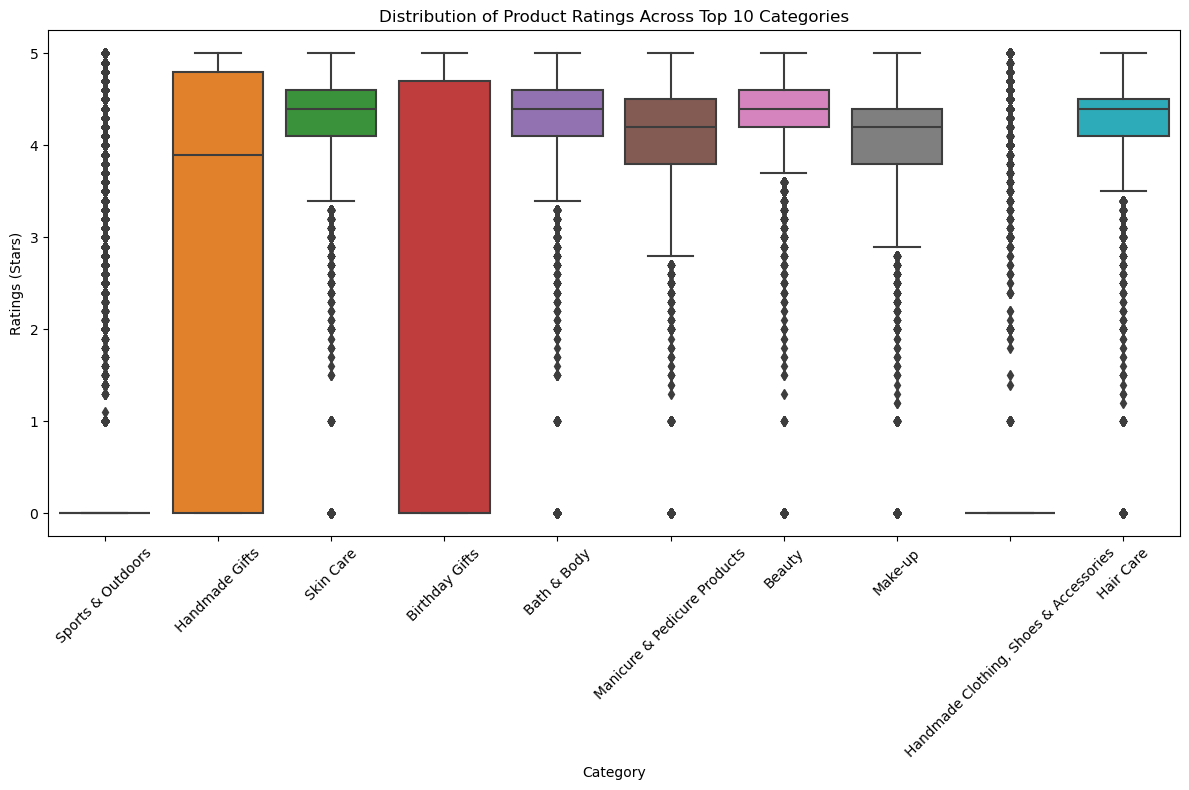

In [77]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=dftop_10)
plt.xticks(rotation=45)
plt.title('Distribution of Product Ratings Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Ratings (Stars)')
plt.tight_layout()
plt.show()

In [80]:
# Calculate the median rating for each category
median_ratings = df.groupby('category')['stars'].median()

# Identify the category with the highest median rating
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

highest_median_rating_category,highest_median_rating

('Computer Memory', 4.7)